# Part I - Ford GoBike System Data Exploration
## by Ahmed El-Ashry

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from joypy import joyplot

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
#import the required data set:
trip_data = pd.read_csv('201902-fordgobike-tripdata.csv')
trip_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


## Exploring the dataset:

In [3]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
trip_data.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [5]:
trip_data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


## Modifying the dataset & Creating new columns that could help exploring:

In [6]:
#Modifying the start_time and end_time columns' type to datetime type:
trip_data.start_time = pd.to_datetime(trip_data.start_time)
trip_data.end_time = pd.to_datetime(trip_data.end_time)

In [7]:
#Creating new columns form start_time column:
trip_data['start_hour'] = trip_data.start_time.dt.hour
trip_data['end_hour'] = trip_data.end_time.dt.hour
trip_data['start_weekday'] = trip_data.start_time.dt.day_name()
trip_data['start_day'] = trip_data.start_time.dt.day
trip_data['start_month'] = trip_data.start_time.dt.month_name()

In [8]:
#Creating new columns from duration_sec:
trip_data['duration_min'] = trip_data['duration_sec']/60
trip_data['duration_hour'] = trip_data['duration_sec']/3600

In [9]:
#Creating a class that would order week day:
week_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_classes = pd.api.types.CategoricalDtype(ordered=True, categories=week_days)
trip_data['start_weekday'] = trip_data['start_weekday'].astype(day_classes)

In [10]:
#Creating new column with trip type:
#long_trip: trips over 60 mins
#short_trip: trip less than 60 mins
trip_data['trip_type'] = np.where(trip_data['duration_min']>60, 'long_trip', 'short_trip')

In [11]:
#check the dataset again:
trip_data.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,start_hour,end_hour,start_weekday,start_day,start_month,duration_min,duration_hour,trip_type
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Male,No,17,8,Thursday,28,February,869.750000,14.495833,long_trip
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,NaN,No,18,6,Thursday,28,February,708.683333,11.811389,long_trip
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Male,No,12,5,Thursday,28,February,1030.900000,17.181667,long_trip
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Other,No,17,4,Thursday,28,February,608.166667,10.136111,long_trip
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Male,Yes,23,0,Thursday,28,February,26.416667,0.440278,short_trip
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Male,No,23,0,Thursday,28,February,29.883333,0.498056,short_trip
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,Female,No,23,0,Thursday,28,February,19.116667,0.318611,short_trip
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,Male,No,23,0,Thursday,28,February,26.916667,0.448611,short_trip
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,Other,No,23,0,Thursday,28,February,26.166667,0.436111,short_trip
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,...,Male,No,23,0,Thursday,28,February,17.483333,0.291389,short_trip


In [12]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [13]:
trip_data.shape

(183412, 24)

In [14]:
trip_data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,start_hour,end_hour,start_day,duration_min,duration_hour
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437,13.458421,13.614769,15.298977,12.101307,0.201688
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689,4.724978,4.739638,8.028187,29.906496,0.498442
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,0.000000,0.000000,1.000000,1.016667,0.016944
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000,9.000000,9.000000,8.000000,5.416667,0.090278
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000,14.000000,14.000000,15.000000,8.566667,0.142778
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000,17.000000,18.000000,22.000000,13.266667,0.221111
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,23.000000,23.000000,28.000000,1424.066667,23.734444


In [15]:
#Chech for outlier with the trips duration:
trip_data.query('duration_hour > 22')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,start_hour,end_hour,start_weekday,start_day,start_month,duration_min,duration_hour,trip_type
5203,83195,2019-02-27 14:47:23.181,2019-02-28 13:53:58.433,243.0,Bancroft Way at College Ave,37.869360,-122.254337,248.0,Telegraph Ave at Ashby Ave,37.855956,...,Female,Yes,14,13,Wednesday,27,February,1386.583333,23.109722,long_trip
8631,81549,2019-02-27 09:41:38.552,2019-02-28 08:20:48.386,138.0,Jersey St at Church St,37.750900,-122.427411,140.0,Cesar Chavez St at Dolores St,37.747858,...,Female,No,9,8,Wednesday,27,February,1359.150000,22.652500,long_trip
85465,84548,2019-02-16 15:48:25.029,2019-02-17 15:17:33.080,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,368.0,Myrtle St at Polk St,37.785434,...,Male,No,15,15,Saturday,16,February,1409.133333,23.485556,long_trip
95750,82512,2019-02-14 13:56:21.728,2019-02-15 12:51:34.315,368.0,Myrtle St at Polk St,37.785434,-122.419622,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,...,Other,No,13,12,Thursday,14,February,1375.200000,22.920000,long_trip
101361,85444,2019-02-13 17:59:55.124,2019-02-14 17:43:59.954,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,98.0,Valencia St at 16th St,37.765052,...,NaN,No,17,17,Wednesday,13,February,1424.066667,23.734444,long_trip
107581,79548,2019-02-12 17:45:50.536,2019-02-13 15:51:38.859,79.0,7th St at Brannan St,37.773492,-122.403672,66.0,3rd St at Townsend St,37.778742,...,Female,No,17,15,Tuesday,12,February,1325.800000,22.096667,long_trip
112435,83407,2019-02-11 16:25:33.069,2019-02-12 15:35:40.956,77.0,11th St at Natoma St,37.773507,-122.416040,344.0,16th St Depot,37.766349,...,Male,No,16,15,Monday,11,February,1390.116667,23.168611,long_trip
127999,83519,2019-02-09 15:16:17.537,2019-02-10 14:28:17.270,72.0,Page St at Scott St,37.772406,-122.435650,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,...,Male,No,15,14,Saturday,9,February,1391.983333,23.199722,long_trip
153705,83772,2019-02-05 12:44:54.286,2019-02-06 12:01:06.631,78.0,Folsom St at 9th St,37.773717,-122.411647,345.0,Hubbell St at 16th St,37.766483,...,NaN,No,12,12,Tuesday,5,February,1396.200000,23.270000,long_trip
173365,82385,2019-02-02 13:07:43.036,2019-02-03 12:00:48.175,377.0,Fell St at Stanyan St,37.771917,-122.453704,377.0,Fell St at Stanyan St,37.771917,...,NaN,No,13,12,Saturday,2,February,1373.083333,22.884722,long_trip


In [16]:
trip_data.isnull().sum().sum()

17318

In [17]:
trip_data.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [18]:
trip_data.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [19]:
#dropping the "other" cells from the member_gender column
trip_data.memper_gender = trip_data.member_gender.replace('Other', np.NaN, inplace=True)

In [20]:
trip_data.member_gender.value_counts()

Male      130651
Female     40844
Name: member_gender, dtype: int64

In [21]:
trip_data.start_month.value_counts()

February    183412
Name: start_month, dtype: int64

In [22]:
trip_data.to_csv('201902-fordgobike-tripdata-modified.csv', index=False)

### What is the structure of your dataset?

> The Dataset constructs from 183415 rows and 16 columns.
> It contains data for one month only.


### What is/are the main feature(s) of interest in your dataset?

> Study the customer journey with GoBike company and try to find ways to improve their experience to increase the followings:
>1. Increase customer trip durations.
>2. Increase customer retention.
>3. Increase customer satisfaction for the company.
>4. Increase company revenue.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> 1. Customer types.
> 2. Trip Duration.

## Univariate Exploration



### 1. Does customer status has affect on usage?

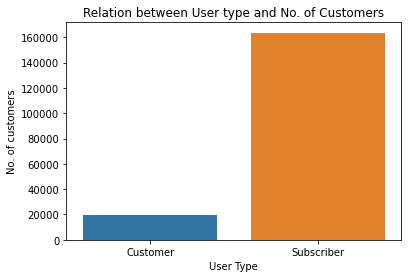

In [23]:
sb.countplot(data=trip_data, x='user_type')
plt.xlabel('User Type')
plt.ylabel('No. of customers')
plt.title('Relation between User type and No. of Customers');

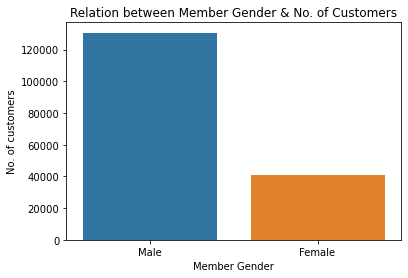

In [24]:
sb.countplot(data=trip_data, x='member_gender')
plt.xlabel('Member Gender')
plt.ylabel('No. of customers')
plt.title('Relation between Member Gender & No. of Customers');

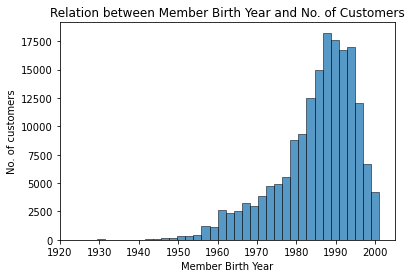

In [25]:
sb.histplot(trip_data.member_birth_year, bins=60)
plt.xlim(1920, 2005)
plt.xlabel('Member Birth Year')
plt.ylabel('No. of customers')
plt.title('Relation between Member Birth Year and No. of Customers');

### Observation:

>1. Most company customers are males.
>2. Most company customers are subscriber.
>3. Most company customers are born between 1985 to 1995

### 2. What is the average usage duration?

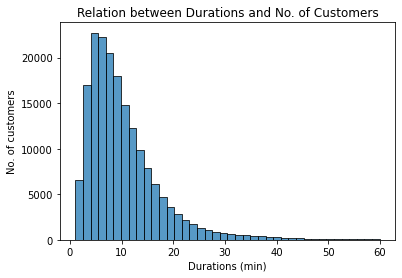

In [26]:
sb.histplot(trip_data.query('trip_type == "short_trip"').duration_min, bins=40)
plt.xlabel('Durations (min)')
plt.ylabel('No. of customers')
plt.title('Relation between Durations and No. of Customers');

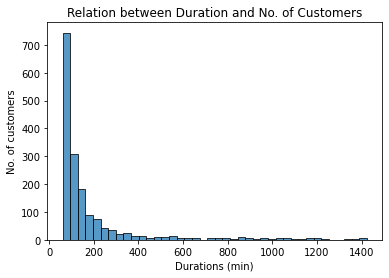

In [27]:
sb.histplot(trip_data.query('trip_type == "long_trip"').duration_min, bins=40)
plt.xlabel('Durations (min)')
plt.ylabel('No. of customers')
plt.title('Relation between Duration and No. of Customers');

### Obervation:
>1. Most of customer usage duration between 3 and 12 mins for short trips; trips less that 60 mins.
>2. Most of customer usage duration between 60 and 120 mins for long trips; trips more that 60 mins.

### 3. Does the day of the week has effects on customer retention?

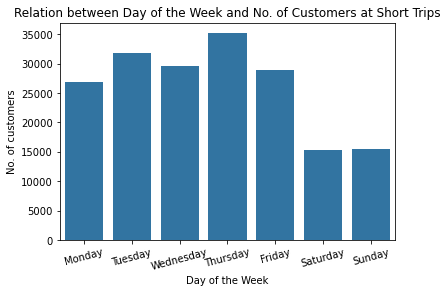

In [28]:
color_base = sb.color_palette()[0]
sb.countplot(data=trip_data, x='start_weekday', order=week_days, color=color_base)
plt.xticks(rotation=15)

plt.xlabel('Day of the Week')
plt.ylabel('No. of customers')
plt.title('Relation between Day of the Week and No. of Customers at Short Trips');

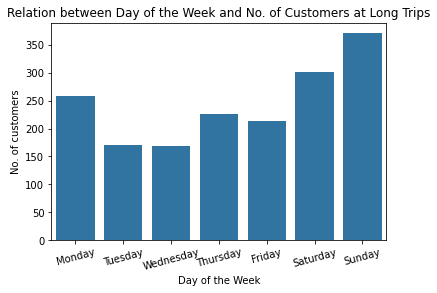

In [29]:
color_base = sb.color_palette()[0]
sb.countplot(data=trip_data.query('trip_type == "long_trip"'), x='start_weekday', order=week_days, color=color_base)
plt.xticks(rotation=15)

plt.xlabel('Day of the Week')
plt.ylabel('No. of customers')
plt.title('Relation between Day of the Week and No. of Customers at Long Trips');

### Observation:
>1. Customer retention descreases in Saturdays and Sundays.
>2. Customer usage duration increases in Saturdays and Sundays.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

From the graphs above, we can see that:
>1. Most company customers are born between 1985 to 1995.
>2. Male customers are more than female customers.
>3. Customer retention descreases at Saturdays and Sundays, although most of long trips happen at them.
>4. Average duration for a trip is between 3 to 15 mins.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>The unusual distribution is on customer retention at Saturdays and Sunday.
>The dataset is fine, although we should identify data with short trip duration; less than 60 min, from data with long trip duration; more than 60 mins, for better study for the data.

## Bivariate Exploration


### 1. Do customers tend to use bike at specific hours of the day?

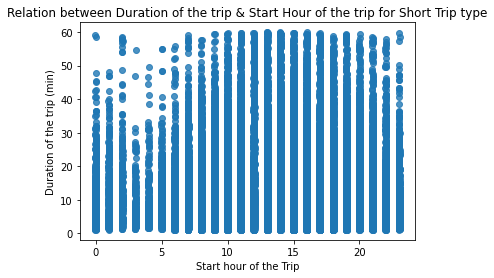

In [30]:
sb.regplot(data=trip_data.query('trip_type == "short_trip"'), x='start_hour', y='duration_min', 
           x_jitter=0.04, fit_reg=False)

plt.xlabel('Start hour of the Trip')
plt.ylabel('Duration of the trip (min)')
plt.title('Relation between Duration of the trip & Start Hour of the trip for Short Trip type');

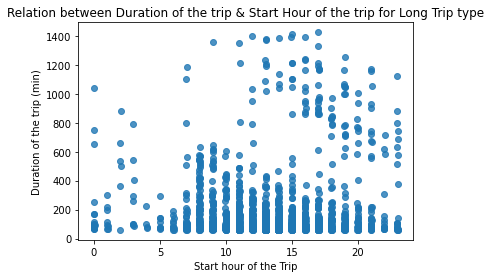

In [31]:
sb.regplot(data=trip_data.query('trip_type == "long_trip"'), x='start_hour', y='duration_min', 
           x_jitter=0.04, fit_reg=False)


plt.xlabel('Start hour of the Trip')
plt.ylabel('Duration of the trip (min)')
plt.title('Relation between Duration of the trip & Start Hour of the trip for Long Trip type');

### Observation:
>1. Customers tend to use bikes for longer durations between 9 A.M to 8 P.M.

### 2. Does average usage duration for males higher than average for females?

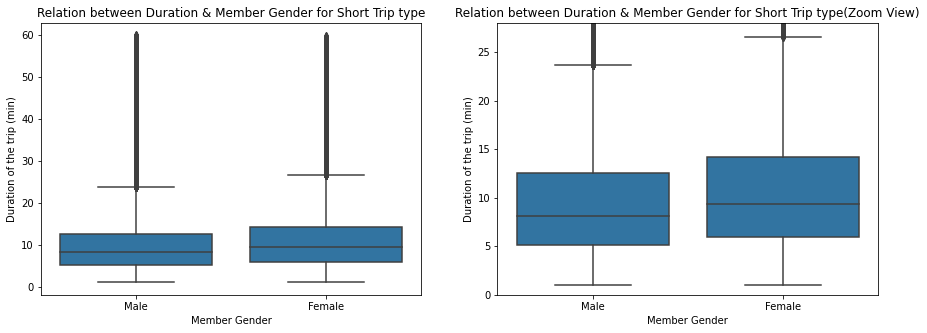

In [32]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sb.boxplot(data=trip_data.query('trip_type == "short_trip"'), x='member_gender', y='duration_min', color=color_base);
plt.xlabel('Member Gender')
plt.ylabel('Duration of the trip (min)')
plt.title('Relation between Duration & Member Gender for Short Trip type');

plt.subplot(1,2,2)
sb.boxplot(data=trip_data.query('trip_type == "short_trip"'), x='member_gender', y='duration_min', color=color_base)
plt.ylim(0,28)

plt.xlabel('Member Gender')
plt.ylabel('Duration of the trip (min)')
plt.title('Relation between Duration & Member Gender for Short Trip type(Zoom View)');

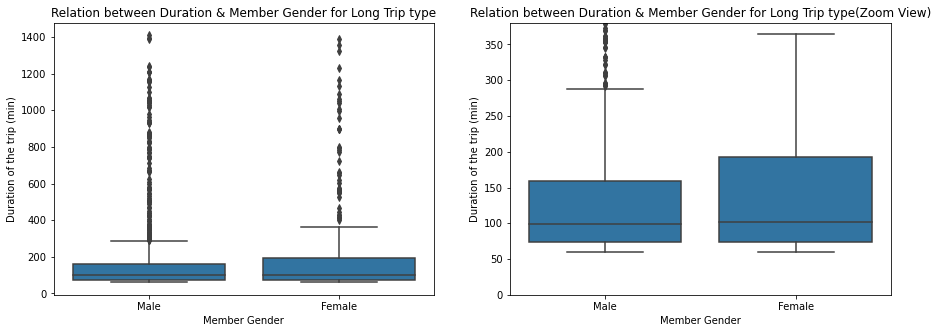

In [33]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sb.boxplot(data=trip_data.query('trip_type == "long_trip"'), x='member_gender', y='duration_min', color=color_base);
plt.xlabel('Member Gender')
plt.ylabel('Duration of the trip (min)')
plt.title('Relation between Duration & Member Gender for Long Trip type');

plt.subplot(1,2,2)
sb.boxplot(data=trip_data.query('trip_type == "long_trip"'), x='member_gender', y='duration_min', color=color_base);
plt.ylim(0,380);
plt.xlabel('Member Gender')
plt.ylabel('Duration of the trip (min)')
plt.title('Relation between Duration & Member Gender for Long Trip type(Zoom View)');

### Observation:
>1. It seems that females average usage duration at short trips is higher than the average for males.

### 3. Does Subscribers average usage duration higher than average for Customers?

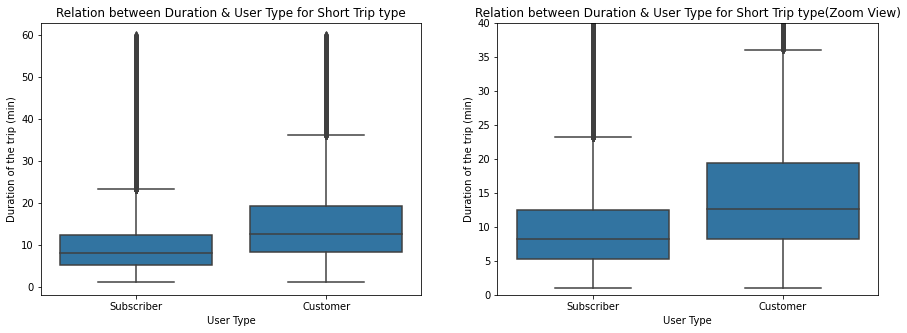

In [34]:
user_type_order=['Subscriber','Customer']
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sb.boxplot(data=trip_data.query('trip_type == "short_trip"'), x='user_type', y='duration_min', color=color_base);
plt.xlabel('User Type')
plt.ylabel('Duration of the trip (min)')
plt.title('Relation between Duration & User Type for Short Trip type');

plt.subplot(1,2,2)
sb.boxplot(data=trip_data.query('trip_type == "short_trip"'), x='user_type', y='duration_min', color=color_base)
plt.ylim(0,40);
plt.xlabel('User Type')
plt.ylabel('Duration of the trip (min)')
plt.title('Relation between Duration & User Type for Short Trip type(Zoom View)');

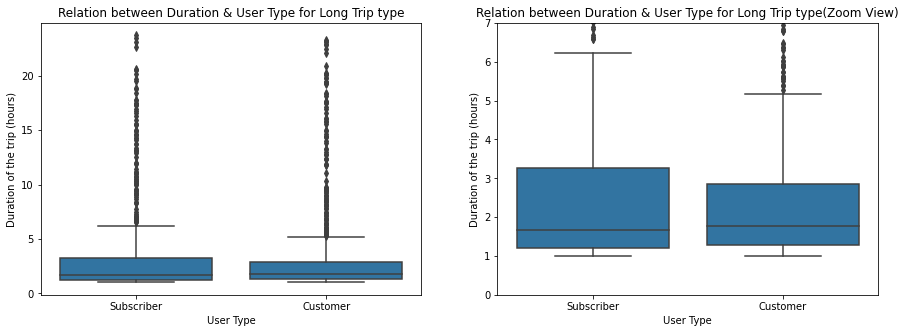

In [35]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sb.boxplot(data=trip_data.query('trip_type == "long_trip"'), x='user_type', y='duration_hour', 
           color=color_base, order=user_type_order)
plt.xlabel('User Type')
plt.ylabel('Duration of the trip (hours)')
plt.title('Relation between Duration & User Type for Long Trip type');

plt.subplot(1,2,2)
sb.boxplot(data=trip_data.query('trip_type == "long_trip"'), x='user_type', y='duration_hour', 
           color=color_base, order=user_type_order)
plt.ylim(0,7)
plt.xlabel('User Type')
plt.ylabel('Duration of the trip (hours)')
plt.title('Relation between Duration & User Type for Long Trip type(Zoom View)');

### Observation:
>1. Customers average usage duration at short trips is higher than average for subscribers.
>2. Customers average usage duration at long trips is almost equal to the average for subscribers.

### 4. Does customer usage duration increases during holidays?

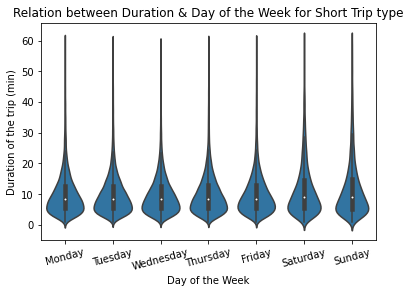

In [36]:
sb.violinplot(data=trip_data.query('trip_type == "short_trip"'), x='start_weekday', y='duration_min', color=color_base)
plt.xticks(rotation=15);
plt.xlabel('Day of the Week')
plt.ylabel('Duration of the trip (min)')
plt.title('Relation between Duration & Day of the Week for Short Trip type');

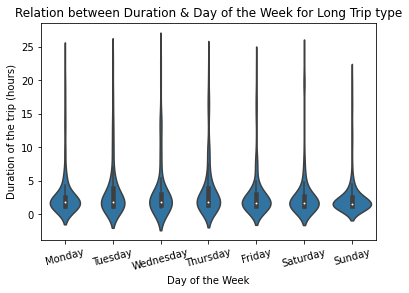

In [37]:
sb.violinplot(data=trip_data.query('trip_type == "long_trip"'), x='start_weekday', y='duration_hour', color=color_base)
plt.xticks(rotation=15);
plt.xlabel('Day of the Week')
plt.ylabel('Duration of the trip (hours)')
plt.title('Relation between Duration & Day of the Week for Long Trip type');

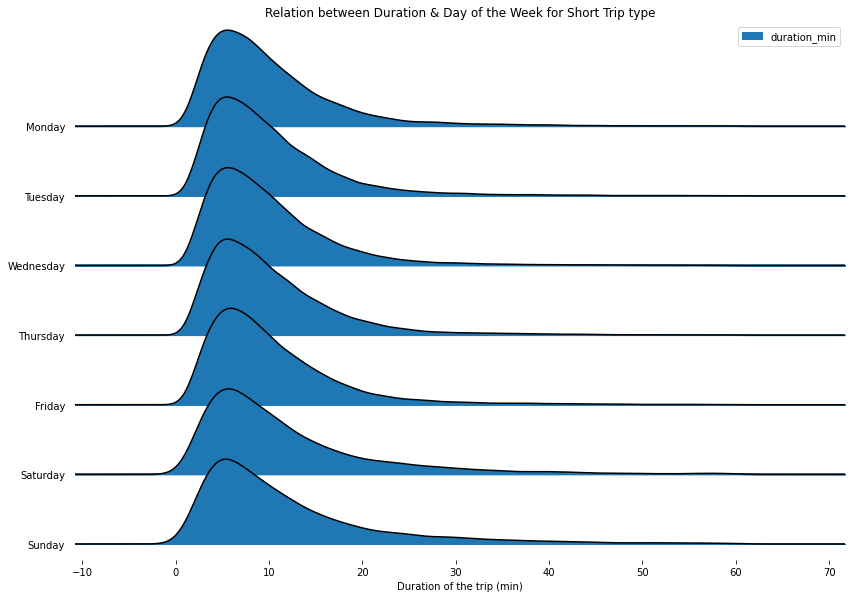

In [38]:
joyplot(data=trip_data.query('trip_type == "short_trip"')[['duration_min', 'start_weekday']], 
        by="start_weekday", figsize=(12, 8), legend=True);


plt.xlabel('Duration of the trip (min)')
plt.title('Relation between Duration & Day of the Week for Short Trip type');

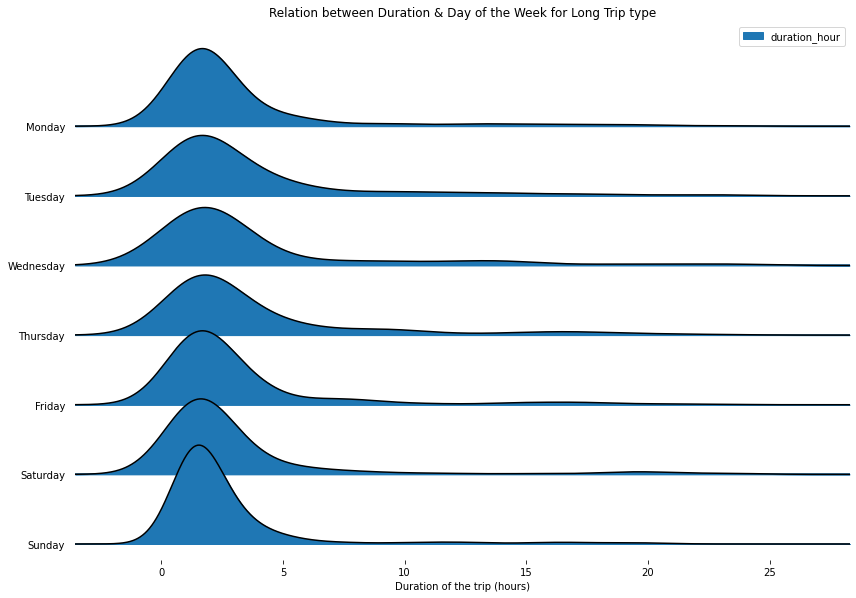

In [39]:
joyplot(data=trip_data.query('trip_type == "long_trip"')[['duration_hour', 'start_weekday']], 
        by="start_weekday", figsize=(12, 8), legend=True);

plt.xlabel('Duration of the trip (hours)')
plt.title('Relation between Duration & Day of the Week for Long Trip type');

### Observation:
>1. Usage durations are almost the same over week day at short trips.
>2. Usage duration are very high during Fridays, Saturday & Sundays at long trips.

### 5. Do customer tend to move bikes from East to West, or something like that?

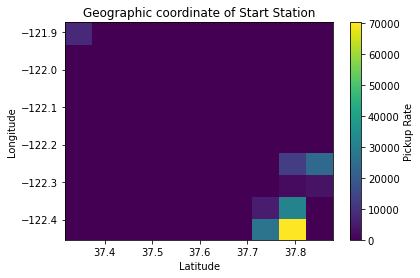

In [40]:
plt.hist2d(data=trip_data, x='start_station_latitude', y='start_station_longitude', cmap='viridis')
plt.colorbar(label='Pickup Rate');
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Geographic coordinate of Start Station');

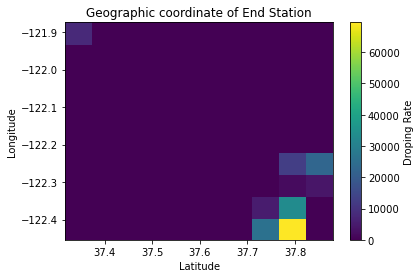

In [41]:
plt.hist2d(data=trip_data, x='end_station_latitude', y='end_station_longitude', cmap='viridis')
plt.colorbar(label='Droping Rate');
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Geographic coordinate of End Station');

### Oberservation:
>1. No, average picking and dropping rates are the same for different stations

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> 1. Customers tend to use bikes for longer durations between 9 A.M to 8 P.M.
> 2. It seems that females average usage duration at short trips is higher than the average for males.
> 3. Customers average usage duration at short trips is higher than average for subscribers.
> 4. Usage durations are almost the same over week day at short trips.
> 5. Usage duration are very high during Fridays, Saturday & Sundays at long trips.
> 6. Average picking and dropping rates are the same for different stations

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes, usage duration are very high during Fridays, Saturday & Sundays at long trips.

## Multivariate Exploration




### 1. What is the relation between trip durations and customer age & gender?

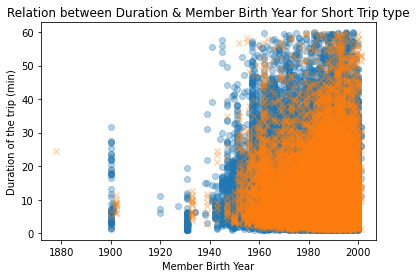

In [42]:
ttype_markers = [['Male', 'o'],['Female','x']]

for ttype, marker in ttype_markers:
    plot_data = trip_data.query('trip_type == "short_trip"').loc[trip_data.member_gender == ttype]
    sb.regplot(data=plot_data, x='member_birth_year', y='duration_min', 
               x_jitter=0.04, marker=marker, scatter_kws={'alpha':1/3}, fit_reg=False);

plt.xlabel('Member Birth Year')
plt.ylabel('Duration of the trip (min)')
plt.title('Relation between Duration & Member Birth Year for Short Trip type');

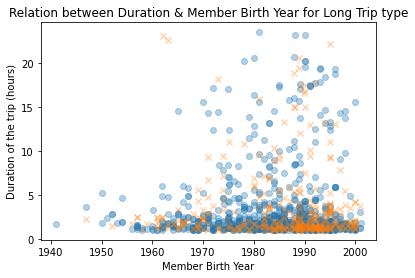

In [43]:
ttype_markers = [['Male', 'o'],['Female','x']]

for ttype, marker in ttype_markers:
    plot_data = trip_data.query('trip_type == "long_trip"').loc[trip_data.member_gender == ttype]
    sb.regplot(data=plot_data, x='member_birth_year', y='duration_hour', 
               x_jitter=0.04, marker=marker, scatter_kws={'alpha':1/3}, fit_reg=False);
    
plt.xlabel('Member Birth Year')
plt.ylabel('Duration of the trip (hours)')
plt.title('Relation between Duration & Member Birth Year for Long Trip type');

### Observation:
>1. Older males' trip durations are longer than that for old females.

### 2. Is there a relation between trip durations and Customer gender and subscribtion type?

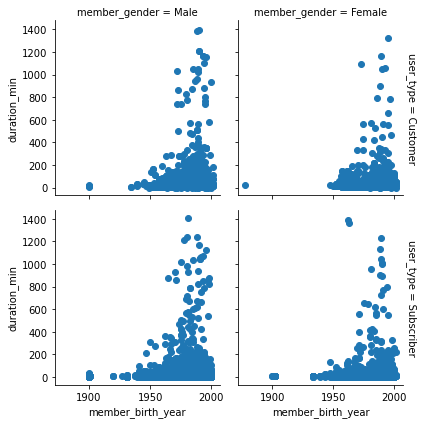

In [44]:
g = sb.FacetGrid(data = trip_data, row = 'user_type', col = 'member_gender', 
                 margin_titles = True)
g.map(plt.scatter,'member_birth_year', 'duration_min');

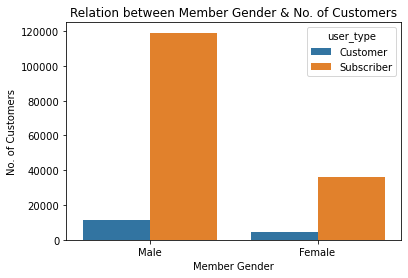

In [45]:
sb.countplot(data=trip_data, x='member_gender', hue='user_type');
plt.xlabel('Member Gender')
plt.ylabel('No. of Customers')
plt.title('Relation between Member Gender & No. of Customers');

### Observation:
>1. Seems that male subscriber are more than female subscribers.

### 3. Is there a relation between females and males behavior over the days of the week?

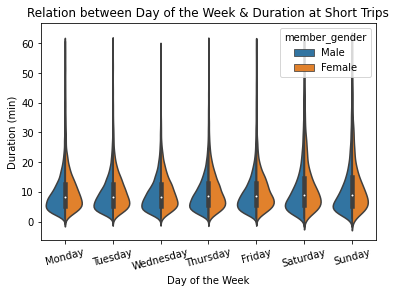

In [46]:
sb.violinplot(data=trip_data.query('trip_type == "short_trip"'), x='start_weekday', y='duration_min', 
              hue='member_gender', split=True)
plt.xticks(rotation=15);
plt.xlabel('Day of the Week')
plt.ylabel('Duration (min)')
plt.title('Relation between Day of the Week & Duration at Short Trips');

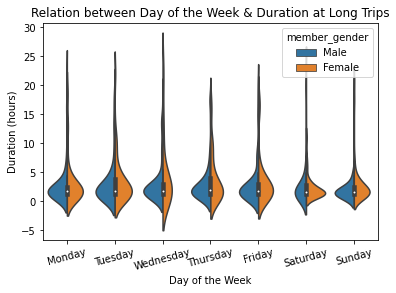

In [47]:
sb.violinplot(data=trip_data.query('trip_type == "long_trip"'), x='start_weekday', y='duration_hour', 
              hue='member_gender', split=True)
plt.xticks(rotation=15);
plt.xlabel('Day of the Week')
plt.ylabel('Duration (hours)')
plt.title('Relation between Day of the Week & Duration at Long Trips');

### Observation:
>1. Females' trips duration at Wednesdays are longer than any other day of the week for the long trips.

### 4. Is there a relation between subscribers and customers behavior over the days of the week?

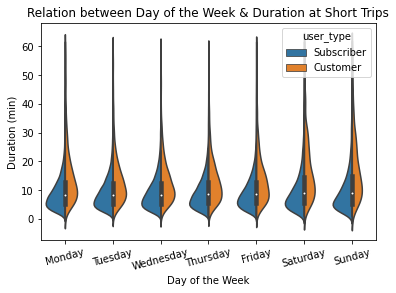

In [48]:
sb.violinplot(data=trip_data.query('trip_type == "short_trip"'), x='start_weekday', y='duration_min', 
              hue='user_type', split=True)
plt.xticks(rotation=15);
plt.xlabel('Day of the Week')
plt.ylabel('Duration (min)')
plt.title('Relation between Day of the Week & Duration at Short Trips');

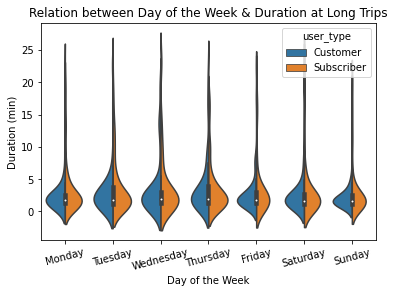

In [49]:
sb.violinplot(data=trip_data.query('trip_type == "long_trip"'), x='start_weekday', y='duration_hour', 
              hue='user_type', split=True)
plt.xticks(rotation=15);
plt.xlabel('Day of the Week')
plt.ylabel('Duration (min)')
plt.title('Relation between Day of the Week & Duration at Long Trips');

### Observation:
>1. Customer types tend to use bike over longer duration at Saturdays and Sundays at short trips

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> 1. Older males' trip durations are longer than that for old females.
> 2. Females' trips duration at Wednesdays are longer than any other day of the week for the long trips.
> 3. Customer types tend to use bike over longer duration at Saturdays and Sundays.

### Were there any interesting or surprising interactions between features?

> 1. Customer types tend to use bike over longer duration at Saturdays and Sundays

## Conclusions
> 1. Average duration for a trip is between 3 to 15 mins, and we want to increase this.
> 2. Customer retention descreases at Saturdays and Sundays, although most of long trips happen at them. So, promotions could help increase retention rate at these days.
>3. Customer types tend to use bike at long trips at Saturdays and Sundays.
